In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("yolcu_hava_2024.csv")
df["tarih"] = pd.to_datetime(df["tarih"])
df["gun"] = (df["tarih"] - pd.Timestamp("2024-01-01")).dt.days + 1
df["ay"] = df["tarih"].dt.month

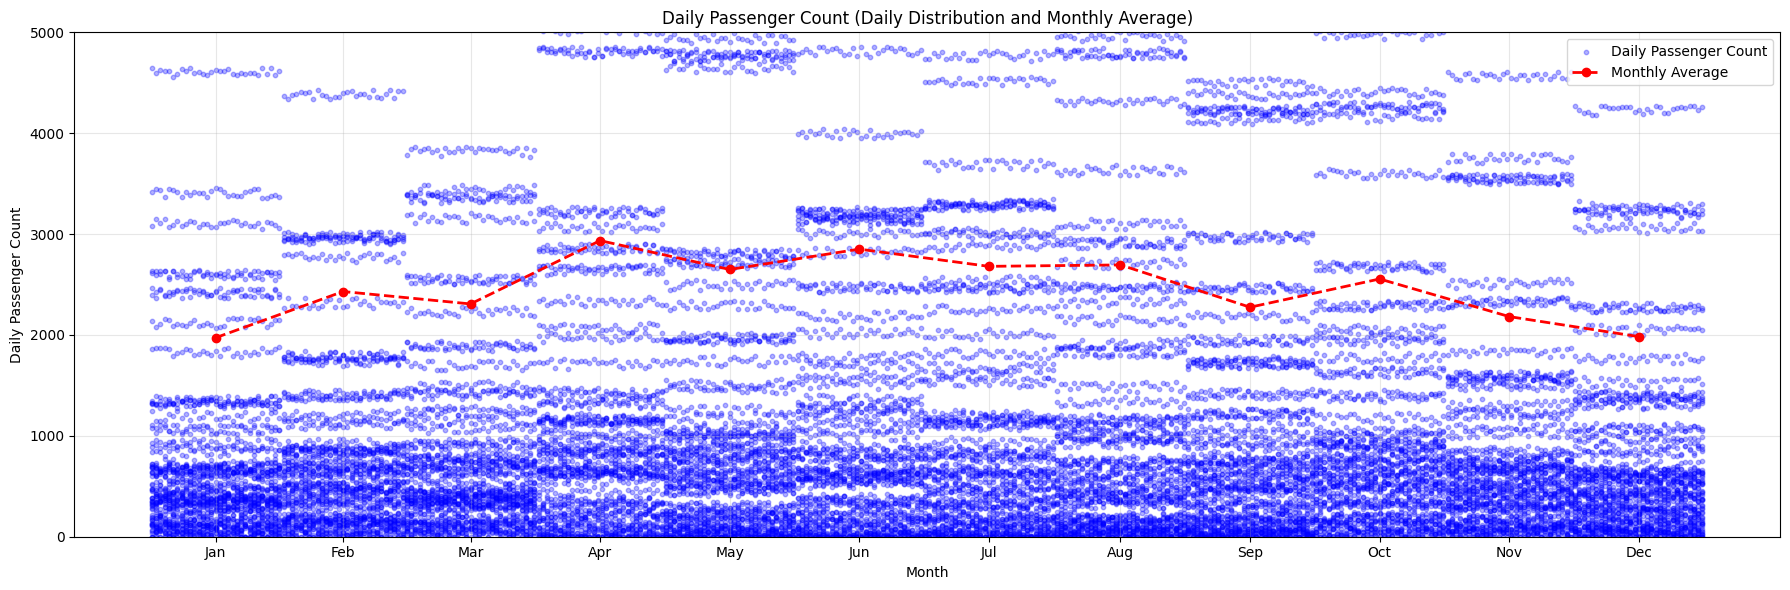

In [32]:
plt.figure(figsize=(18, 6))
plt.scatter(df["gun"], df["gunluk_yolcu"], alpha=0.3,
            s=10, color='blue', label="Daily Passenger Count")

monthly_avg = df.groupby("ay")["gunluk_yolcu"].mean()
monthly_midpoints = df.groupby("ay")["gun"].mean()
plt.plot(monthly_midpoints, monthly_avg, color='red', linestyle='--',
         linewidth=2, marker='o', label="Monthly Average")

month_names = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_ticks = df.groupby("ay")["gun"].mean()

plt.xticks(month_ticks, month_names)
plt.ylim(0, 5000)
plt.xlabel("Month")
plt.ylabel("Daily Passenger Count")
plt.title("Daily Passenger Count (Daily Distribution and Monthly Average)")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


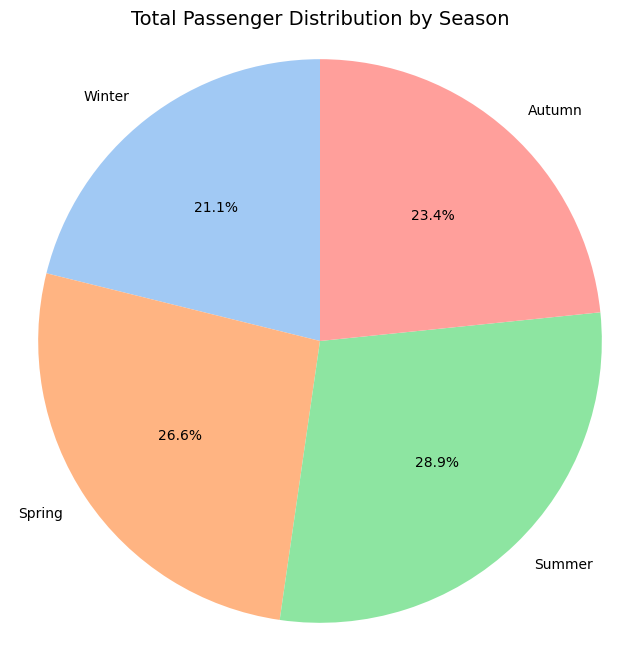

In [14]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["ay"].apply(get_season)
season_total = df.groupby("season")["gunluk_yolcu"].sum().reindex(["Winter", "Spring", "Summer", "Autumn"])

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(season_total, labels=season_total.index,
        autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Total Passenger Distribution by Season", fontsize=14)
plt.axis('equal')
plt.show()


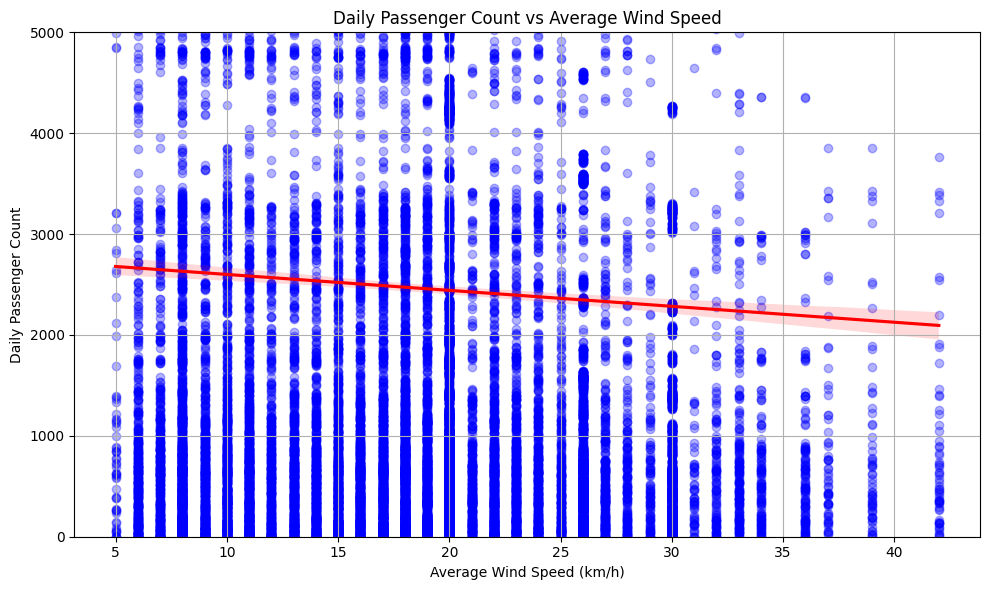

In [15]:
df_clean = df[["gunluk_yolcu", "ruzgar_hizi"]].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x="ruzgar_hizi", y="gunluk_yolcu",
            scatter_kws={"alpha": 0.3, "color": "blue"},
            line_kws={"color": "red"})

plt.title("Daily Passenger Count vs Average Wind Speed")
plt.xlabel("Average Wind Speed (km/h)")
plt.ylabel("Daily Passenger Count")
plt.grid(True)
plt.ylim(0, 5000)
plt.tight_layout()
plt.show()


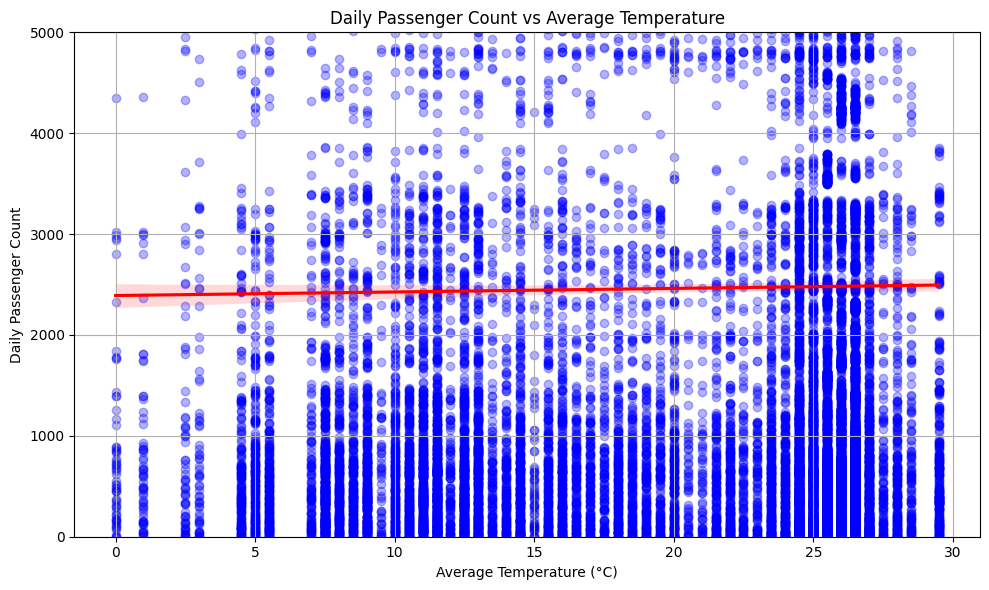

In [16]:
df["average_temperature"] = (df["maksimum_sicaklik"] + df["minimum_sicaklik"]) / 2

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="average_temperature", y="gunluk_yolcu",
            scatter_kws={"alpha": 0.3, "color": "blue"},
            line_kws={"color": "red"})

plt.title("Daily Passenger Count vs Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 5000)
plt.grid(True)
plt.tight_layout()
plt.show()


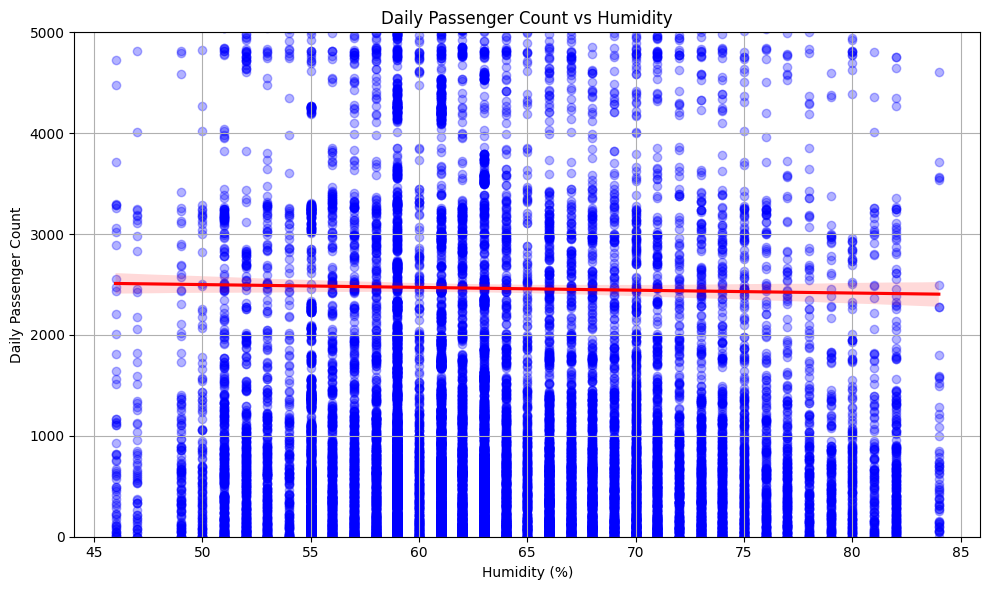

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="nem", y="gunluk_yolcu",
            scatter_kws={"alpha": 0.3, "color": "blue"},
            line_kws={"color": "red"})

plt.title("Daily Passenger Count vs Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 5000)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_96445/1037688923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="donem", y="gunluk_yolcu", palette="pastel")


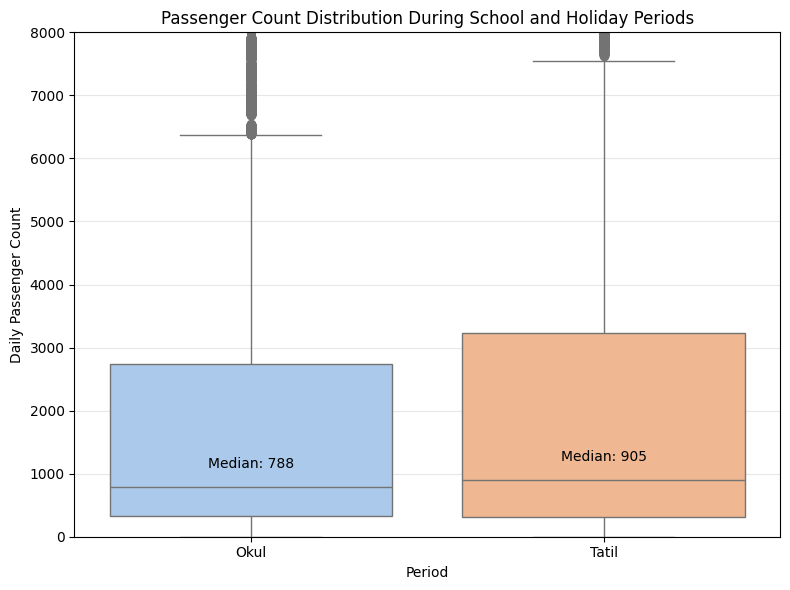

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x="donem", y="gunluk_yolcu", palette="pastel")

# Add median labels
grouped = df.groupby("donem")["gunluk_yolcu"].median()
for i, median_val in enumerate(grouped):
    ax.text(i, median_val + 300, f"Median: {int(median_val)}", 
            horizontalalignment='center', color='black', fontsize=10)

plt.title("Passenger Count Distribution During School and Holiday Periods")
plt.xlabel("Period")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 8000)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_96445/1879975137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="donem", y="gunluk_yolcu", estimator="mean", palette="Set2")


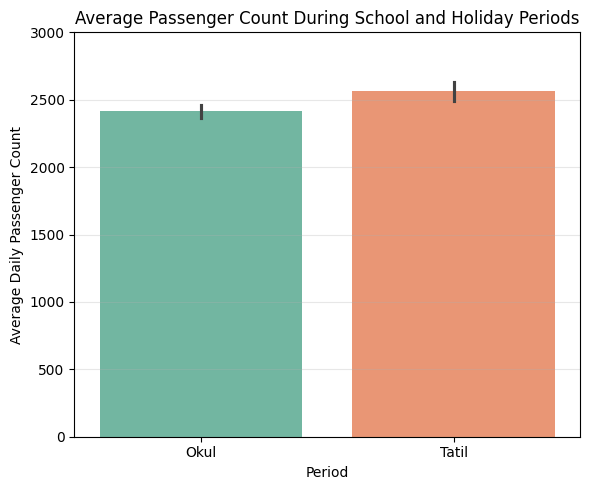

In [25]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x="donem", y="gunluk_yolcu", estimator="mean", palette="Set2")

plt.title("Average Passenger Count During School and Holiday Periods")
plt.xlabel("Period")
plt.ylabel("Average Daily Passenger Count")
plt.ylim(0, 3000)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


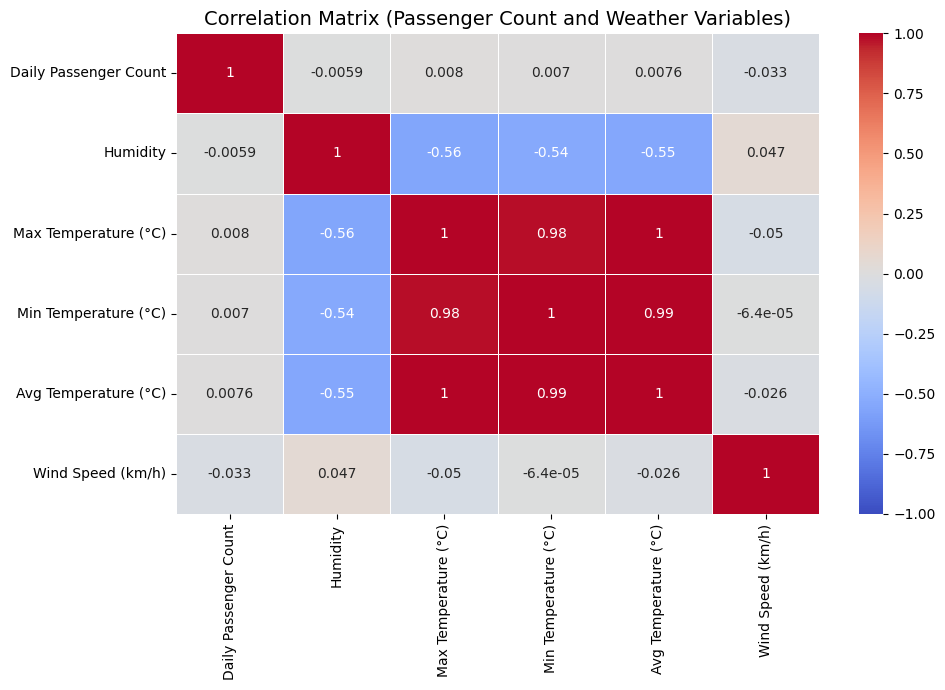

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv("yolcu_hava_2024.csv")
df["average_temperature"] = (df["maksimum_sicaklik"] + df["minimum_sicaklik"]) / 2

# Rename columns to English
df.rename(columns={
    "gunluk_yolcu": "Daily Passenger Count",
    "nem": "Humidity",
    "maksimum_sicaklik": "Max Temperature (°C)",
    "minimum_sicaklik": "Min Temperature (°C)",
    "ruzgar_hizi": "Wind Speed (km/h)",
    "average_temperature": "Avg Temperature (°C)"
}, inplace=True)

# Columns for correlation matrix
corr_cols = [
    "Daily Passenger Count",
    "Humidity",
    "Max Temperature (°C)",
    "Min Temperature (°C)",
    "Avg Temperature (°C)",
    "Wind Speed (km/h)"
]

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Correlation Matrix (Passenger Count and Weather Variables)", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_96445/718471253.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=besiktas_df, x="day_of_week", y="gunluk_yolcu", hue="donem", ci="sd", palette="Set2")


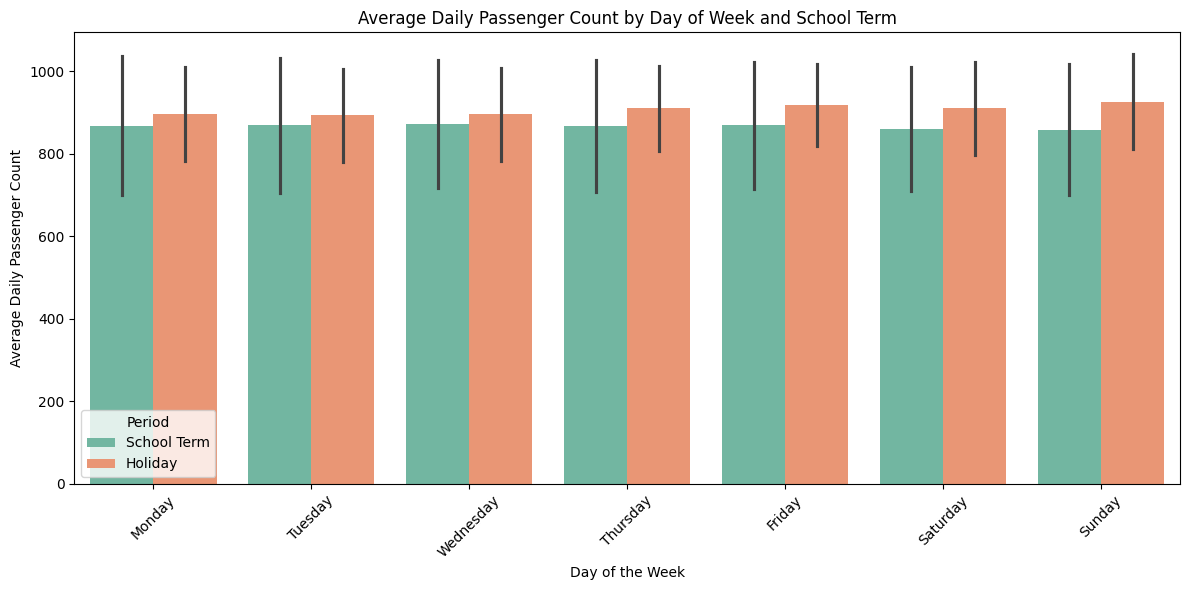

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku ve filtrele
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Gerekli sütunları oluştur
besiktas_df["tarih"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["tarih"].dt.day_name()  # Monday, Tuesday vs.
besiktas_df["donem"] = besiktas_df["donem"].map({"Tatil": "Holiday", "Okul": "School Term"})

# Multivariate bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=besiktas_df, x="day_of_week", y="gunluk_yolcu", hue="donem", ci="sd", palette="Set2")

plt.title("Average Daily Passenger Count by Day of Week and School Term")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_96445/3566729511.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


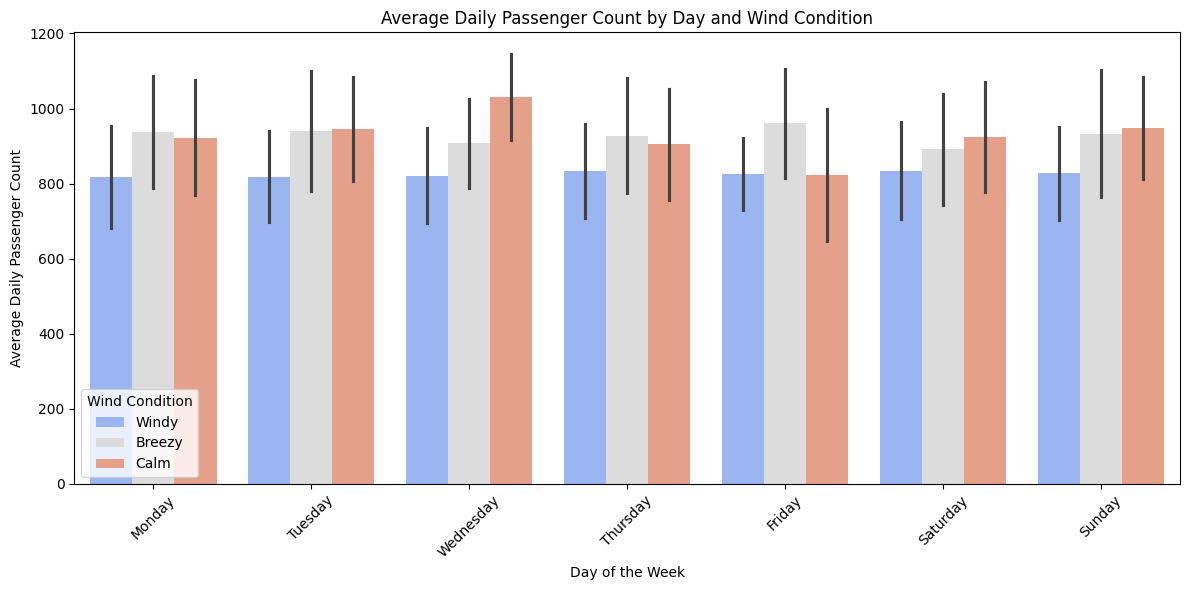

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Convert wind speed to categorical labels
def wind_category(speed):
    if speed < 10:
        return "Calm"
    elif speed < 20:
        return "Breezy"
    else:
        return "Windy"

besiktas_df["wind_condition"] = besiktas_df["ruzgar_hizi"].apply(wind_category)

# Prepare English columns
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["date"].dt.day_name()
besiktas_df["daily_passenger_count"] = besiktas_df["gunluk_yolcu"]

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=besiktas_df,
    x="day_of_week",
    y="daily_passenger_count",
    hue="wind_condition",
    ci="sd",
    palette="coolwarm"
)

plt.title("Average Daily Passenger Count by Day and Wind Condition")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Wind Condition")
plt.tight_layout()
plt.show()
